# Predizione Indice Di Borsa: NASDAQ
## Autori: Luca Morlino e Valerio Di Zio


## Descrizione del problema
### Cos'è NASDAQ?
Il Nasdaq Composite è l'indice azionario statunitense che comprende titoli nazionali e internazionali in cui sono quotate più di 5.200 società. È stato creato nel 1971 con una base di 100.
Le società che compongono l'indice seguono i criteri di capitalizzazione. Il Nasdaq è un indice molto volatile dove sono integrate le più importanti società tecnologiche del mondo.

### Obiettivo
L'obiettivo generale è quello di creare un algoritmo che preveda il valore di chiusura del titolo a inizio giornata.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline
from utility import plot_model_on_data

## Estrazione dati
I dati relativi a ^IXIC vengono scaricati dal servizio [Yahoo! Finance](https://it.finance.yahoo.com/).
Per fare ciò viene utilizzata la libreria yfinance che permette l'estrazione di dati in forma di oggetti Python facilmente interrogabili.
In particolare, la usiamo per ottenere i dati storici in forma di Dataframe Pandas.

In [2]:
import yfinance

- Creiamo un oggetto Ticker che rappresenta uno specifico titolo o indice
- Nel nostro caso il simbolo del Nasdaq con il suo valore in dollari è ^IXIC

In [3]:
nasdaq = yfinance.Ticker("^IXIC")

- Utilizziamo il metodo history per ottenere i dati storici, partendo dal 1 Gennaio 2011 fino al 31 Dicembre 2021.

In [4]:
data = nasdaq.history(start="2011-01-02", end="2021-12-31", actions=False)

Ad esempio, guardiamo i dati relativi agli ultimi 5 giorni dell'anno 2021. 

In [5]:
data.tail(5)

,Open,High,Low,Close,Volume
Date,,,,,
2021-12-23,15544.790039,15697.980469,15528.910156,15653.370117,3918200000
2021-12-27,15696.830078,15871.400391,15696.830078,15871.259766,3730120000
2021-12-28,15895.200195,15901.469727,15757.070312,15781.719727,3623600000
2021-12-29,15794.919922,15821.809570,15679.849609,15766.219727,3694500000
2021-12-30,15758.980469,15868.089844,15729.160156,15741.559570,3732730000


Andiamo a contare il numero di istanze ricavate

In [6]:
data.shape[0]

2768

## Features
Il nostro dataset, inizialmente, ha 5 features:
- Open: è il valore in dollari di una singola azione all'orario di apertura
- High: è il valore massimo in dollari raggiunto durante la giornata
- Low: è il valore minimo in dollari raggiunto durante la giornata
- Close: è il valore in dollari di una singola azione all'orario di chiusura
- Volume: il volume di trading indica (nel nostro caso) il valore in dollari delle azioni scambiate durante la giornata

Per comodità estraiamo una serie per ciascuna colonna, per potersi riferire ad esse con un unico nome.

In [7]:
open = data["Open"]
high = data["High"]
low = data["Low"]
close = data["Close"]
volume = data["Volume"]

## Rappresentazione dei dati
Possiamo tracciare il grafico dell'andamento del prezzo, basandoci sulla feature "Open".

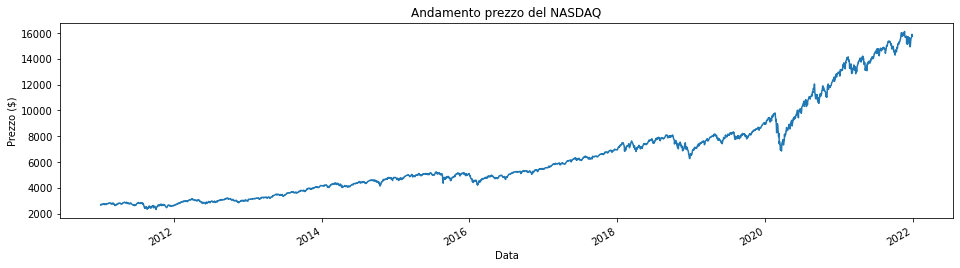

In [8]:
open.plot(figsize=(16,4))
plt.title("Andamento prezzo del NASDAQ")
plt.xlabel("Data")
plt.ylabel("Prezzo ($)");

Utilizzando la libreria plotly è possibile visualizzare in un unico grafico 4 features (Open, High, Low, Close)

In [9]:
import plotly.graph_objects as go

In [10]:
candlestick = go.Candlestick(
                            x=data.index,
                            open=data['Open'],
                            high=data['High'],
                            low=data['Low'],
                            close=data['Close']
                            )


Il grafico è rappresentato mediante l'utilizzo di Candele, queste ultime rappresentano l'andamento del prezzo di una giornata.

<img src="candlestick.jpeg" alt="Candlestick" style="width:700px;"/>


In [11]:
from ipywidgets.widgets import interact
from datetime import timedelta, datetime

Mostriamo tramite grafico a candele gli ultimi 50 giorni.

In [12]:

termDate = datetime(2021, 12, 31)
DD = timedelta(days=100)
earlier = termDate - DD
earlier_str = earlier.strftime("%Y-%m-%d")

In [13]:
@interact(ymin=(0,13000,500), ymax=(11000,30000,500))
def plot_candlestick(ymin=13000, ymax=17000):    
    fig = go.Figure(data=[candlestick])
    fig.update_layout(
        width=1000, height=700,
        title="Andamento prezzo NASDAQ Candlestick",
        yaxis_title='Prezzo ($)'
    )
    fig.update_xaxes(type="date", range=[earlier_str, termDate])
    fig.update_yaxes(range=[ymin,ymax])
    fig.show()

interactive(children=(IntSlider(value=13000, description='ymin', max=13000, step=500), IntSlider(value=17000, …

Mostriamo ora alcune statistiche generali raggruppate per anno come:
- Media
- Deviazione Standard
- Min e Max
- Quartili


In [14]:
hlm = (high + low) / 2
hlm.groupby(hlm.index.year).describe()

,count,mean,std,min,25%,50%,75%,max
Date,,,,,,,,
2011,252.0,2676.244785,122.032911,2352.779907,2604.299988,2693.872559,2776.783752,2873.795044
2012,250.0,2963.932197,113.122627,2640.204956,2894.392517,2975.859985,3050.596283,3187.510010
2013,252.0,3539.060040,306.827311,3089.994995,3243.216248,3492.297485,3777.697510,4169.250000
2014,252.0,4373.320877,211.983366,3997.234985,4202.081360,4355.214966,4535.299988,4806.310059
2015,252.0,4943.834490,157.062179,4493.520020,4838.318787,4984.995117,5069.158813,5216.715088
2016,252.0,4985.242454,297.691485,4251.489990,4759.471130,4951.322510,5239.396118,5490.989990
2017,251.0,6231.484259,394.575343,5425.280029,5885.290161,6239.820068,6491.050049,6989.715088
2018,251.0,7426.148126,367.453986,6272.675049,7146.000122,7394.964844,7732.107544,8101.434814
2019,252.0,7934.295049,471.745590,6528.669922,7678.299988,7964.969971,8194.679871,9019.660156


Guardando i risultati notiamo come i valori della colonna `count` variano a seconda dell'anno, questo accade perché la borsa non è aperta 24/7 ma è chiusa in alcuni giorni, ad esempio i festivi.

Notiamo anche come la media (`mean`) del prezzo aumenta ogni anno, il che rende il NASDAQ un indice solido.

Notiamo anche come nel 2020, l'anno della pandemia, ci sia stata una deviazione standard (`std`) molto alta rispetto agli altri anni.

## Prevedere il valore di chiusura a inizio giornata

La variabile da predire è la features "Close" relativa alla data odierna.

In [15]:
y = close

`high`, `low`, `volume` non possono essere utilizzate in quanto il loro valore non è noto a inizio giornata.
Attualmente l'unica feature utilizzabile è il valore `open`.

In [16]:
features = {"Open" : open}
X = pd.DataFrame(features)

Suddividiamo i dati in un training set e in un validation set con la funzione `split_data`. L'anno inserito verrà utilizzato come test e tutti i precedenti (fino al 2011) verranno utilizzati come training.

In [17]:
def split_data(X, y, split):
    lowerRange = X.index.year < split
    upperRange = (X.index.year > split-1) & (X.index.year < split+1)
    X_train = X.loc[lowerRange]
    y_train = y.loc[lowerRange]
    X_val = X.loc[upperRange]
    y_val = y.loc[upperRange]
    return X_train, X_val, y_train, y_val

## Test 1: Regressione Lineare

Usando training e validation set creati in precedenza addestriamo un modello di regressione lineare e calcoliamo R<sup>2</sup>.

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X_train, X_val, y_train, y_val = split_data(X, y, 2020)
model.fit(X_train,y_train)
model.score(X_val, y_val)

0.9921675537422088

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



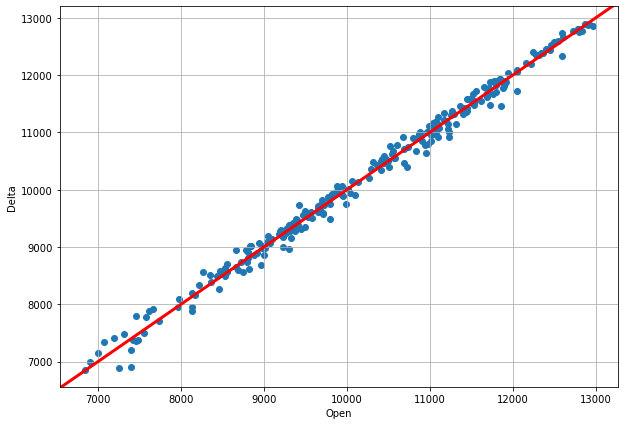

In [19]:
plot_model_on_data(X_val,y_val,model)

Il punteggio R<sup>2</sup> del modello risulta molto alto. Questo è dovuto al fatto che i valore `Open` e `Close` sono molto correlati.

Per avere un riscontro dell'effetiva efficienza del modello calcoliamo il guadagno effettivo di un possibile investitore.

Per far ciò implementiamo un protocollo di trading che dati i valori di chiusura reali e predetti restituisce il guadagno effettivo.

**La cifra investita in questo caso è pari al valore di apertura che varia giornalmente**.

Definiamo la variabile differenza $\Delta_d=C_d-O_d$ tra il valore di chiusura giornaliero $C_d$ e di apertura $O_d$

In [20]:
delta = close - open

- Poniamo questo come il valore che **deve essere predetto** dal modello
- L'investitore agirà in base alla predizione $\hat{\Delta}_d$ in modo analogo a prima
  - se $\hat{\Delta}_d > 0$, acquista un titolo a inizio giornata e lo rivende alla fine
  - se $\hat{\Delta}_d < 0$, vende un titolo a inizio giornata e lo ricompra alla fine

### Importiamo alcune funzioni utili 

Possiamo definire una metrica "guadagno" per validare il modello, che restituisca il guadagno totale di un investitore che opera nel periodo a cui si riferisce il validation set

In [21]:
from utility import gain

Il ROI (Return on investiment) esprime il guadagno di una o più operazioni in borsa in rapporto all'investimento iniziale.

In [22]:
from utility import roi

Definiamo anche una funzione che stampi le metriche di valutazione del modello.

In [23]:
from utility import print_eval

La funzione `prepare_data` restituisce un Dataframe con le colonne indicate e una serie con i valori della variabile da predire corrispondenti alle righe selezionate del Dataframe.

In [24]:
from utility import prepare_data

Addestriamo ora invece un modello di regressione lineare prevedendo il delta e calcoliamo il `gain` e il `ROI`.

In [25]:
X, y = prepare_data(features, delta)
X_train, X_val, y_train, y_val = split_data(X, y, 2020)
model = LinearRegression()
model.fit(X_train, y_train)
print_eval(X_val, y_val, model, open)

Gain: -1673.49$
 ROI: -16.414%


Il risultato non è per nulla soddisfacente.

## Aggiungiamo Features
Definiamo alcune funzioni che ci permetteranno di calcolare alcuni indicatori molto comuni nel mondo funanziario.

- MACD:
- SMA:
- EMA:
- RSI:
- MFI:
- ATR:
- FI:

In più aggiungiamo 4 features che possono risultare utili: i prezzi all'apertura traslati di 1,2,3,4 giorni.

In [26]:
features = {
    "Open": open,
    "OpenShift1": open.shift(1),
    "OpenShift2": open.shift(2),
    "OpenShift3": open.shift(3),
    "OpenShift4": open.shift(4),
}

In [27]:
def computeMACD (df, n_fast, n_slow, n_smooth):
    data = df['Open']
    
    fastEMA = data.ewm(span=n_fast, min_periods=n_slow).mean()
    slowEMA = data.ewm(span=n_slow, min_periods=n_slow).mean()
    MACD = pd.Series(fastEMA-slowEMA, name = 'MACD')
    df = df.join(MACD)
    
    return df

def calculateSMA(data, ndays): 
    SMA = pd.Series(data['Open'].rolling(ndays).mean(), name = 'SMA') 
    return SMA

def addSMA(first, second):
    sma1 = calculateSMA(data, first)
    sma2 = calculateSMA(data, second)
    
    sma = (np.array(sma2) - np.array(sma1)) / np.array(sma2)
    sma = pd.Series(data=sma, index=data.index)
    data[f"SMA{first}-{second}"] = sma
    features[f"SMA{first}-{second}"] = data[f"SMA{first}-{second}"]
    
def calculate_ema(prices, days, smoothing=2):
    ema = [sum(prices[:days]) / days]
    for price in prices[days:]:
        ema.append((price * (smoothing / (1 + days))) + ema[-1] * (1 - (smoothing / (1 + days))))
    return ema

def addEMA(first, second):
    ema1 = calculate_ema(data['Open'], first)
    ema2 = calculate_ema(data['Open'], second)

    ema = (np.array(ema2) - np.array(ema1[(second-first):])) / np.array(ema2)
    ema = pd.Series(data=ema, index=data[(second-1):].index)
    data[f"EMA{first}-{second}"] = ema
    features[f"EMA{first}-{second}"] = data[f"EMA{first}-{second}"]
    
def rsi(close, periods = 14): # il parametro close intende il valore di chiusura del giorno precedente ovvero quello di apertura del giorno corrente
    close_delta = close.diff()
    up = close_delta.clip(lower=0)
    down = -1 * close_delta.clip(upper=0)
    ma_up = up.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
    ma_down = down.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
    rsi = ma_up / ma_down
    rsi = 100 - (100/(1 + rsi))
    return rsi

def gainForMFI(x):
    return ((x > 0) * x).sum()

def lossForMFI(x):
    return ((x < 0) * x).sum()

def mfi(high, low, close, volume, n=14): # il parametro close intende il valore di chiusura del giorno precedente ovvero quello di apertura del giorno corrente
    typical_price = (high + low + close)/3
    money_flow = typical_price * volume
    mf_sign = np.where(typical_price > typical_price.shift(1), 1, -1)
    signed_mf = money_flow * mf_sign
    mf_avg_gain = signed_mf.rolling(n).apply(gainForMFI, raw=True)
    mf_avg_loss = signed_mf.rolling(n).apply(lossForMFI, raw=True)
    return (100 - (100 / (1 + (mf_avg_gain / abs(mf_avg_loss))))).shift(1).to_numpy() # spostiamo la colonna di 1 in avanti così da avere per ogni riga il valore dell'MFI del giorno precedente

def atr(high, low, close, n=14):
    high_low = data['High'] - data['Low']
    high_cp = np.abs(data['High'] - data['Close'].shift())
    low_cp = np.abs(data['Low'] - data['Close'].shift())
    df = pd.concat([high_low, high_cp, low_cp], axis=1)
    true_range = np.max(df, axis=1)
    average_true_range = true_range.rolling(14).mean()
    return average_true_range.shift(1) # spostiamo la colonna di 1 in avanti così da avere per ogni riga il valore dell'ATR del giorno precedente

def forceIndex(data, ndays): 
    FI = pd.Series(data['Open'].diff(ndays) * data['Volume'], name = 'ForceIndex') 
    return FI


In [28]:
addEMA(5,20)
addEMA(8,15)
addEMA(20,50)

addSMA(5,20)
addSMA(8,15) #aggiungendo questo indice il guadagno diminuisce negli anni "positivi" e aumenta negli anni "negativi"
addSMA(20,50) #aggiungendo questo indice il guadagno diminuisce negli anni "positivi" e aumenta negli anni "negativi"

data["RSI"] = rsi(data["Open"])
data = computeMACD(data, 12, 26, 9)
data["MFI"] = mfi(data["High"], data["Low"], data["Close"], data["Volume"], 14)
data["ATR"] = atr(data["High"], data["Low"], data["Close"], 14)
data["FI-13"] = forceIndex(data, 13)
data["FI-50"] = forceIndex(data, 50)

features["MACD"] = data["MACD"]
features["RSI"] = data["RSI"] #abbassa i profitti (inutile per ora)
features["MFI"] = data["MFI"] #anche questa sembrerebbe inutile per ora
features["ATR"] = data["ATR"] #STRANO...
features["FI-13"] = data["FI-13"] #assolutamente NO! da risultati orribili (con regressione lineare)
features["FI-50"] = data["FI-50"] #assolutamente NO! da risultati orribili (con regressione lineare)

In [29]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

## Test delle features
Verifichiamo quali features usare per ottenere il risultato migliore.
Per fare ciò creiamo una funzione che testando TUTTE le combinazioni di features ci restituisce la combinazione migliore.

In [30]:
import itertools

def getBestFeatures(features, model):
    keys = np.array(list(features.keys()))
    mylist = ["1" + "".join(seq) for seq in itertools.product("01", repeat=len(keys)-1)]
    #keys = np.array(['Open', 'OpenShift1', 'OpenShift2', 'OpenShift3','OpenShift4','EMA5-20','EMA8-15','EMA20-50','SMA5-20','SMA8-15','SMA20-50','MACD','RSI','MFI','ATR','FI-13','FI-50'])  
    dict2 = {x:features[x] for x in keys}

    def str2bool(v):
        v_bool = [True]
        for i in v[1:]:
            v_bool.append(i=='1')
        return np.array(v_bool)

    best_ROI = 0;
    best_features = {}

    for i in range(0,len(mylist)):
        dict2 = {x:features[x] for x in keys[str2bool(mylist[i])]}
        X, y = prepare_data(dict2, delta)
        X_train, X_val, y_train, y_val = split_data(X, y, 2017)
        model.fit(X_train, y_train)

        preds = model.predict(X_val)
        if roi(y_val, preds, open) > best_ROI:
            best_ROI = roi(y_val, preds, open)
            best_features = dict2

    return best_features, best_ROI


Abbiamo rilevato che le sul nostro caso di studio lo split m

Verifichiamo come si comporta il nostro modello utilizzando tutte le features disponibili.

In [31]:
X, y = prepare_data(features, delta)
X_train, X_val, y_train, y_val = split_data(X, y, 2017)
model = LinearRegression()
model.fit(X_train, y_train)
print_eval(X_val, y_val, model, open)

Gain: 753.51$
 ROI: 12.089%


In [32]:
import time
start_time = time.time()
new_features, new_ROI = getBestFeatures(features, LinearRegression())
print("Tempo di esecuzione per la ricerca delle features migliori: %s secondi" % (time.time() - start_time))

Tempo di esecuzione per la ricerca delle features migliori: 146.430908203125 secondi


In [33]:
print(new_features.keys())
print(new_ROI)

dict_keys(['Open', 'OpenShift1', 'OpenShift2', 'OpenShift4', 'EMA5-20', 'EMA20-50', 'SMA5-20', 'RSI', 'MFI'])
0.19753765968646347


Le feature selezionate sono 'Open', 'OpenShift1', 'OpenShift2', 'OpenShift4', 'EMA5-20', 'EMA20-50', 'SMA5-20', 'RSI', 'MFI'

In [235]:
X, y = prepare_data(new_features, delta)
X_train, X_val, y_train, y_val = split_data(X, y, 2017)
linearRegressionModel = LinearRegression()
linearRegressionModel.fit(X_train, y_train)
print_eval(X_val, y_val, linearRegressionModel, open)

Gain: 1231.29$
 ROI: 19.754%


Osserviamo che con la selezione delle features migliori abbiamo ottenuto un ROI più alto

### Modelli POSSIBILI

- Regressione Lineare (OK)
- Ridge (OK)
- ElasticNet (OK)
- Logistic Regression (SCARTATA PER ORA)
- XGBoost (OK)
- Perceptron
- SVM
- Random Forest
- CatBoost (si fa con le variabili categoriche)
- LightGBM
- Mini rete neurale (OPZIONALE)

## Test 2: Regressione Ridge

Proviamo ora il modello di regressione Ridge con regolarizzazione per evitare che i coefficienti crescano troppo.

Creiamo un nostro scorer che valuti i modelli in base al ROI

In [236]:
from sklearn.metrics import make_scorer
roi_scorer = make_scorer(roi, open=open, greater_is_better=True)

### Validazione k-fold per serie temporali

- Come alternativa allo split `KFold`, scikit-learn offre il `TimeSeriesSplit(k)` per la nostra situazione in cui vogliamo però mantenere l'ordine temporale in training e validation set

In [237]:
from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit(11) #11 anni dal 2011 al 2022

In [238]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

X, y = prepare_data(new_features, delta)
model = Pipeline([
    ("scale",  StandardScaler()),
    ("linreg", Ridge())
])

grid = {"linreg__alpha": [0.1, 1, 10, 50]}
gs = GridSearchCV(model, param_grid=grid, scoring=roi_scorer, cv=tss)
gs.fit(X, y)
pd.DataFrame(gs.cv_results_).sort_values("mean_test_score", ascending=False).head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_linreg__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,split10_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002597,0.001718,0.000856,0.000251,0.1,{'linreg__alpha': 0.1},0.058566,-0.147950,-0.053027,0.005561,0.167542,0.067635,0.007224,0.125928,0.140708,0.241799,0.063338,0.061575,0.103259,1
1,0.001863,0.001167,0.000775,0.000167,1,{'linreg__alpha': 1},0.022940,-0.160276,-0.027370,0.028247,0.216820,0.137975,-0.041895,0.011380,-0.042139,0.229107,0.161164,0.048723,0.116705,2
2,0.002038,0.002621,0.000687,0.000115,10,{'linreg__alpha': 10},-0.004830,-0.139849,-0.036286,-0.004966,0.073174,-0.022045,0.036510,-0.064211,-0.115495,0.125826,0.132548,-0.001784,0.084705,3


In [242]:
ridgeModel = Pipeline([
    ("scale",  StandardScaler()),
    ("linreg", Ridge(alpha=0.1))
])
ridgeModel.fit(X_train, y_train)
print_eval(X_val, y_val, ridgeModel, open)

Gain: 1209.81$
 ROI: 19.409%


- Per la regressione Ridge il parametro migliore è $\alpha$=0.1 con un profitto medio annuo del 6.1%:
- **Ottenendo profitto migliore utilizzando le features selezionate `new_features`**
- *Utilizzando invece tutte le features otteniamo un profitto del 4.8%*

## Test 3: ElasticNet

In [38]:
from sklearn.linear_model import ElasticNet
X, y = prepare_data(features, delta)
model = Pipeline([
    ("scale",  StandardScaler()),
    ("linreg", ElasticNet())
])

grid = {"linreg__alpha":  [1, 2, 3, 5], "linreg__l1_ratio": [0.1, 0.2, 0.3, 0.4, 0.5]}
gs = GridSearchCV(model, param_grid=grid, scoring=roi_scorer, cv=tss)
gs.fit(X, y)
pd.DataFrame(gs.cv_results_).sort_values("mean_test_score", ascending=False).head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_linreg__alpha,param_linreg__l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,...,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,split10_test_score,mean_test_score,std_test_score,rank_test_score
11,0.002034,0.001454,0.000671,0.000091,3,0.2,"{'linreg__alpha': 3, 'linreg__l1_ratio': 0.2}",-0.022005,-0.157559,-0.030941,...,0.104191,0.208429,0.174931,-0.043080,-0.010256,0.359223,0.078736,0.073062,0.138109,1
8,0.002671,0.001734,0.000646,0.000058,2,0.4,"{'linreg__alpha': 2, 'linreg__l1_ratio': 0.4}",-0.022005,-0.157559,-0.030941,...,0.128933,0.124732,0.197573,-0.028569,-0.000009,0.347559,0.075512,0.071180,0.131736,2
9,0.002219,0.001861,0.000686,0.000074,2,0.5,"{'linreg__alpha': 2, 'linreg__l1_ratio': 0.5}",-0.022005,-0.157559,-0.030941,...,0.148839,0.168290,0.210738,-0.022782,0.046942,0.203526,0.081493,0.066509,0.110502,3


In [245]:
X, y = prepare_data(features, delta)
X_train, X_val, y_train, y_val = split_data(X, y, 2017)
elasticNetModel = Pipeline([
    ("scale",  StandardScaler()),
    ("linreg", ElasticNet(alpha=3, l1_ratio=0.2))
])
elasticNetModel.fit(X_train, y_train)
print_eval(X_val, y_val, elasticNetModel, open)

Gain: 1474.51$
 ROI: 23.656%


- Per la regressione ElasticNet i parametri migliori sono $\alpha$=3 e L1_RATIO=0.2 con un profitto medio annuo del 7.3%:

- **Ottenendo profitto migliore utilizzando tutte le features**

- *Utilizzando invece le features selezionate otteniamo un profitto del 6.4%*

I risultati ottenuti sono simili, in quanto la regressione ElasticNet permette di penalizzare le variabili irrilevanti, che è lo stesso scopo della nostra funzione: `getBestFeatures()`

## Test 4: Regressione con alberi decisionali

In [39]:
from sklearn.ensemble import RandomForestRegressor

In [322]:
X, y = prepare_data(new_features, delta)
X_train, X_val, y_train, y_val = split_data(X, y, 2020)

In [323]:
simplefilter(action='ignore', category=FutureWarning)

In [325]:
%%time
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report

rfc = Pipeline([
    ('std', StandardScaler()),
    ('rfc', RandomForestRegressor(n_jobs=-1))
])

parameters = {
    'rfc__n_estimators': [100, 200, 300],
    'rfc__max_depth': [2, 4, 6, 8, 10],
    'rfc__min_samples_leaf': [1, 2, 4],
    'rfc__min_samples_split': [2, 5, 10],
}
    

rfc_gs = GridSearchCV(rfc, parameters, cv=tss, n_jobs=-1, scoring=roi_scorer)
rfc_gs.fit(X, y)

print('Random Forest GridSearch finish')

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be rais

Random Forest GridSearch finish
CPU times: user 2.84 s, sys: 451 ms, total: 3.29 s
Wall time: 2min 56s


In [326]:
pd.DataFrame(rfc_gs.cv_results_).sort_values("mean_test_score", ascending=False).head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rfc__max_depth,param_rfc__min_samples_leaf,param_rfc__min_samples_split,param_rfc__n_estimators,params,split0_test_score,...,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,split10_test_score,mean_test_score,std_test_score,rank_test_score
46,0.682071,0.186209,0.030988,0.015473,4,4,2,200,"{'rfc__max_depth': 4, 'rfc__min_samples_leaf':...",0.061047,...,0.264739,-0.045745,-0.00086,0.194522,-0.018226,0.202949,0.1195,0.052287,0.121634,1


In [321]:
X, y = prepare_data(features, delta)
X_train, X_val, y_train, y_val = split_data(X, y, 2020)

randomForestModel = Pipeline([
    ('std', StandardScaler()),
    ('rfc', RandomForestRegressor(n_jobs=-1, n_estimators=200, max_depth=4, min_samples_leaf=1, min_samples_split=10))
])

randomForestModel.fit(X_train, y_train)
print_eval(X_val, y_val, randomForestModel, open)

Gain: 843.19$
 ROI: 8.270%


- Con l'utilizzo della RandomForest otteniamo un profitto medio annuo del 5.9%:

- **Ottenendo profitto migliore utilizzando tutte le features**

- *Utilizzando invece tutte le features otteniamo un profitto del 5.2%*

Effettuiamo un test prendendo come `trainset` gli anni precedenti al 2018 e come `testset` l'anno 2018, notiamo come, inserendo i parametri ricavati dalla Gridsearch, otteniamo un profitto del 24%.

## Test 5: XGBoost

In [45]:
from xgboost import XGBRegressor

In [46]:
X, y = prepare_data(new_features, delta)
X_train, X_val, y_train, y_val = split_data(X, y, 2020)

xgbm = XGBRegressor(objective='reg:squarederror',reg_alpha=0, reg_lambda=1.0, n_estimators=300) #meglio con reg_alpha = 1.0
xgbm.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=300, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1.0, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [47]:
print_eval(X_train, y_train, xgbm, open)
print_eval(X_val, y_val, xgbm, open)

Gain: 66304.66$
 ROI: 1310.401%
Gain: 4104.32$
 ROI: 40.255%


Xgboost senza tuning degli iperparametri restituisce un ROI del 40%

## Test 6: LightGBM

Proviamo ora il LightBGM, alcuni vantaggi sono:
- training più veloce e modelli spesso più efficaci
- minore utilizzo della memoria
- migliore accuratezza
- supporto alla programmazione parallela, distribuita e possibilità di utilizzo della GPU

In [48]:
from lightgbm import LGBMRegressor

In [49]:
%%time
X, y = prepare_data(new_features, delta)
X_train, X_val, y_train, y_val = split_data(X, y, 2020)

lgbm = LGBMRegressor()
lgbm.fit(X_train, y_train)

CPU times: user 1.97 s, sys: 953 ms, total: 2.92 s
Wall time: 1.97 s


LGBMRegressor()

In [50]:
print_eval(X_val, y_val, lgbm, open)

Gain: 4608.22$
 ROI: 45.198%


Pur senza il tuning dei parametri Il LGBM ha un ROI ancora più elevato. 

## Confronto con un modello casuale

Per avere una valutazione più completa del modello, mettiamolo a confronto con quello che accadrebbe prendendo decisioni casuali.

Consideriamo un modello che predica dei valori $\hat{\Delta}_d$ casuali, ma con la stessa distribuzione dei valori $\Delta_d$ reali.

Disegnando un istogramma, vediamo che $\Delta_d$ ha una distribuzione normale

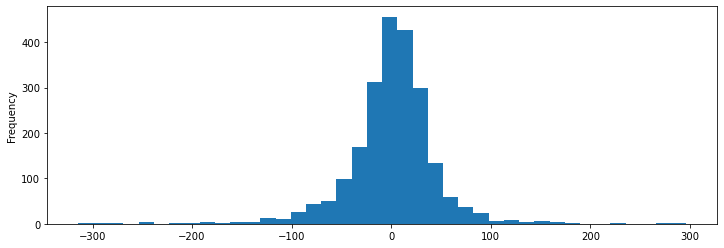

In [51]:
X, y = prepare_data(new_features, delta)
X_train, X_val, y_train, y_val = split_data(X, y, 2020)

y_train.plot.hist(bins=40, figsize=(12, 4));

- Consideriamo una distribuzione normale con media e deviazione standard pari a quelle di `y_train` e generiamo tanti campioni quanti i valori in `y_val`
- Per valutare con maggiore affidabilità l'efficacia di un modello casuale, dobbiamo eseguire test multipli con seed differenti

In [52]:
rois = []
for s in range(1000):
    np.random.seed(s)
    preds = np.random.normal(y_train.mean(), y_train.std(), len(y_val))
    rois.append(roi(y_val, preds, open))
print(np.mean(rois))

0.00994863721797587


Otteniamo un ROI medio prossimo allo 0

## Test parametri

In [53]:
X, y = prepare_data(new_features, delta)
X_train, X_val, y_train, y_val = split_data(X, y, 2020)

In [54]:
model_a = LinearRegression()
model_a.fit(X_train, y_train)
print_eval(X_val, y_val, model_a, open)

Gain: 1904.34$
 ROI: 18.678%


In [55]:
from sklearn.linear_model import Ridge

model_b = Ridge(alpha=10)
model_b.fit(X_train, y_train)
print_eval(X_val, y_val, model_b, open)

Gain: 1425.60$
 ROI: 13.982%


In [56]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

model_c = Pipeline([
    ("scale", StandardScaler()),
    ("lr", LinearRegression())
])
model_c.fit(X_train, y_train)
print_eval(X_val, y_val, model_c, open)

Gain: 1904.34$
 ROI: 18.678%


Vediamo quanto influiscono i parametri relativi alle colonne

In [57]:
pd.DataFrame({
    "linear": model_a.coef_,
    "ridge": model_b.coef_,
    "scaled": model_c.named_steps["lr"].coef_
}, index=X.columns)

,linear,ridge,scaled
Open,-0.111537,-0.068541,-198.430776
OpenShift1,0.071120,0.072637,126.442558
OpenShift2,0.026867,0.007150,47.732506
OpenShift4,0.013415,-0.011465,23.798815
EMA5-20,-905.543245,2.055515,-12.074707
EMA20-50,393.771190,3.819663,5.361893
SMA5-20,690.747624,3.671230,12.288579
RSI,0.439817,0.137838,4.847801
MFI,-0.091282,-0.162490,-1.367235


Con la standardizzazione delle feature otteniamo valori su scale simili, che possiamo confrontare alla pari:
- ad es. negli altri modelli il coefficiente di EMA8-15
  è alto in valore assoluto perché i valori di tale variabile sono bassi 
 - nel modello con standardizzazione assumono invece più peso il numero di stanze (`RM`) e la distanza dagli uffici di collocamento (`DIS`)

## Rete neurale

In [58]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

### Modifica Split
Per utilizzare la rete neurale abbiamo bisogno di modificare leggermente la funzione `split_data`.

In [117]:
def split_data_for_neural_network(X, y, split):
    lowerRange = X.index.year < split-1
    midRange = (X.index.year >= split-1) & (X.index.year < split)
    upperRange = (X.index.year >= split) & (X.index.year < split+1)
    X_train = X.loc[lowerRange]
    y_train = y.loc[lowerRange]
    X_val = X.loc[midRange]
    y_val = y.loc[midRange]
    X_test = X.loc[upperRange]
    y_test = y.loc[upperRange]
    return X_train, X_val,X_test, y_train, y_val, y_test

In [348]:
X, y = prepare_data(features, delta)
X_train, X_val, X_test, y_train, y_val, y_test = split_data_for_neural_network(X,y,2020)

In [331]:
model = Sequential([
    keras.layers.SimpleRNN(20,return_sequences=True,input_shape=[None,1]),

    keras.layers.SimpleRNN(20),

    keras.layers.Dense(1)
    
])

model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, None, 20)          440       
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 20)                820       
                                                                 
 dense_30 (Dense)            (None, 1)                 21        
                                                                 
Total params: 1,281
Trainable params: 1,281
Non-trainable params: 0
_________________________________________________________________


In [349]:
def last_time_step_mse(Y_true, Y_pred):
    return keras.metrics.mean_squared_error(Y_true[:, -1], Y_pred[:, -1])

model = keras.models.Sequential()

model.add(keras.layers.InputLayer((17,1)))

for rate in (1, 2, 4, 8) * 2:
    model.add(keras.layers.Conv1D(filters=20,kernel_size=2,padding="causal", activation="relu", dilation_rate=rate))

model.add(keras.layers.Conv1D(filters=10,kernel_size=1))
    
model.compile(loss="nse", optimizer="Adam", metrics=[last_time_step_mse])

In [350]:
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [351]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

Epoch 1/10


2022-06-22 13:11:21.171533: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


InternalError: Graph execution error:

Detected at node 'mean_squared_error/SquaredDifference' defined at (most recent call last):
    File "/Users/valerio/miniforge3/envs/di/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/Users/valerio/miniforge3/envs/di/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/traitlets/config/application.py", line 965, in launch_instance
      app.start()
    File "/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 712, in start
      self.io_loop.start()
    File "/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/Users/valerio/miniforge3/envs/di/lib/python3.10/asyncio/base_events.py", line 600, in run_forever
      self._run_once()
    File "/Users/valerio/miniforge3/envs/di/lib/python3.10/asyncio/base_events.py", line 1896, in _run_once
      handle._run()
    File "/Users/valerio/miniforge3/envs/di/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 504, in dispatch_queue
      await self.process_one()
    File "/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 493, in process_one
      await dispatch(*args)
    File "/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 400, in dispatch_shell
      await result
    File "/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 724, in execute_request
      reply_content = await reply_content
    File "/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2880, in run_cell
      result = self._run_cell(
    File "/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2935, in _run_cell
      return runner(coro)
    File "/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3134, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3337, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3397, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/jt/lg8h6xz96dd_ycw7z8xltrhh0000gn/T/ipykernel_43922/839186881.py", line 1, in <cell line: 1>
      model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)
    File "/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/keras/engine/training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/keras/engine/training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/keras/engine/training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/keras/engine/training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/keras/engine/training.py", line 890, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/keras/engine/training.py", line 948, in compute_loss
      return self.compiled_loss(
    File "/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 201, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/keras/losses.py", line 139, in __call__
      losses = call_fn(y_true, y_pred)
    File "/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/keras/losses.py", line 243, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/keras/losses.py", line 1327, in mean_squared_error
      return backend.mean(tf.math.squared_difference(y_pred, y_true), axis=-1)
Node: 'mean_squared_error/SquaredDifference'
Detected at node 'mean_squared_error/SquaredDifference' defined at (most recent call last):
    File "/Users/valerio/miniforge3/envs/di/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/Users/valerio/miniforge3/envs/di/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/traitlets/config/application.py", line 965, in launch_instance
      app.start()
    File "/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 712, in start
      self.io_loop.start()
    File "/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/Users/valerio/miniforge3/envs/di/lib/python3.10/asyncio/base_events.py", line 600, in run_forever
      self._run_once()
    File "/Users/valerio/miniforge3/envs/di/lib/python3.10/asyncio/base_events.py", line 1896, in _run_once
      handle._run()
    File "/Users/valerio/miniforge3/envs/di/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 504, in dispatch_queue
      await self.process_one()
    File "/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 493, in process_one
      await dispatch(*args)
    File "/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 400, in dispatch_shell
      await result
    File "/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 724, in execute_request
      reply_content = await reply_content
    File "/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2880, in run_cell
      result = self._run_cell(
    File "/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2935, in _run_cell
      return runner(coro)
    File "/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3134, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3337, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3397, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/jt/lg8h6xz96dd_ycw7z8xltrhh0000gn/T/ipykernel_43922/839186881.py", line 1, in <cell line: 1>
      model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)
    File "/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/keras/engine/training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/keras/engine/training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/keras/engine/training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/keras/engine/training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/keras/engine/training.py", line 890, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/keras/engine/training.py", line 948, in compute_loss
      return self.compiled_loss(
    File "/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 201, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/keras/losses.py", line 139, in __call__
      losses = call_fn(y_true, y_pred)
    File "/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/keras/losses.py", line 243, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/valerio/miniforge3/envs/di/lib/python3.10/site-packages/keras/losses.py", line 1327, in mean_squared_error
      return backend.mean(tf.math.squared_difference(y_pred, y_true), axis=-1)
Node: 'mean_squared_error/SquaredDifference'
2 root error(s) found.
  (0) INTERNAL:  Invalid input shapes
	 [[{{node mean_squared_error/SquaredDifference}}]]
	 [[gradient_tape/sequential_24/conv1d_69/ReluGrad/_74]]
  (1) INTERNAL:  Invalid input shapes
	 [[{{node mean_squared_error/SquaredDifference}}]]
0 successful operations.
0 derived errors ignored. [Op:__inference_train_function_128084]

In [313]:
pred = model.predict(X_test)
pred

1/8 [==>...........................] - ETA: 2s

2022-06-22 12:48:51.524490: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-22 12:48:51.590417: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-22 12:48:51.631916: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 0s 11ms/step


array([[[ 0.18897578],
        [ 0.25482267],
        [ 0.4781746 ],
        ...,
        [ 0.18913923],
        [-0.40097368],
        [-0.36376855]],

       [[ 0.18897578],
        [ 0.25482267],
        [ 0.4781746 ],
        ...,
        [ 0.18911453],
        [-0.3957589 ],
        [-0.3590599 ]],

       [[ 0.18897578],
        [ 0.25482267],
        [ 0.4781746 ],
        ...,
        [ 0.18935764],
        [-0.39746538],
        [-0.36403018]],

       ...,

       [[ 0.18897578],
        [ 0.25482267],
        [ 0.4781746 ],
        ...,
        [ 0.19856802],
        [-0.48010394],
        [-0.5090003 ]],

       [[ 0.18897578],
        [ 0.25482267],
        [ 0.4781746 ],
        ...,
        [ 0.1983442 ],
        [-0.4802651 ],
        [-0.5092915 ]],

       [[ 0.18897578],
        [ 0.25482267],
        [ 0.4781746 ],
        ...,
        [ 0.19780958],
        [-0.4803171 ],
        [-0.5093475 ]]], dtype=float32)

In [316]:
print("ROI:",roi(y_test, pred.squeeze(), open) * 100)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

# Guadagni
### Verifichiamo i guadagni per ogni anno e con ogni algoritmo studiato

- Per fare ciò andiamo a costruire una funzione che permetta, dato l'anno, di stampare un grafico del guadagno per ogni algoritmo.

In [205]:
X, y = prepare_data(new_features, delta)
X_train, X_val, y_train, y_val = split_data(X, y, 2017)
model = LinearRegression()
model.fit(X_train, y_train)
roi(y_val, model.predict(X_val), open) * 100

19.75376596864635

In [327]:
def chartFromYear(anno): 
    # set width of bar
    barWidth = 0.25
    fig = plt.subplots(figsize =(15, 10))

    #LinearRegression
    X, y = prepare_data(new_features, delta)
    X_train, X_val, y_train, y_val = split_data(X, y, anno)
    linearRegressionModel.fit(X_train, y_train)
    linReg = (roi(y_val, linearRegressionModel.predict(X_val), open) * 100)
    
    #Ridge
    ridgeModel.fit(X_train, y_train)
    ridge = (roi(y_val, ridgeModel.predict(X_val), open) * 100)
    
    #ElasticNet
    X, y = prepare_data(features, delta)
    X_train, X_val, y_train, y_val = split_data(X, y, anno)
    elasticNetModel.fit(X_train, y_train)
    elNet = (roi(y_val, elasticNetModel.predict(X_val), open) * 100)
    
    #RandomForest
    X, y = prepare_data(features, delta)
    X_train, X_val, y_train, y_val = split_data(X, y, anno)
    randomForestModel.fit(X_train, y_train)
    randFor = (roi(y_val, randomForestModel.predict(X_val), open) * 100)
    
    #XGBoost
    xgb = 16
    light = 17
    nn = 18

    # Set position of bar on X axis
    br1 = 1
    br2 = br1 + barWidth
    br3 = br2 + barWidth
    br4 = br3 + barWidth
    br5 = br4 + barWidth
    br6 = br5 + barWidth
    br7 = br6 + barWidth
    
    algo = ['LinearRegression\n(new features)',
            'Ridge\n(new features)',
            'ElasticNet\n(features)',
            'RandomForest', 
            'XGBoost', 
            'LightBoost', 
            'Neural Network']
    plt.bar(br1,linReg, color ='purple', width = barWidth,
            edgecolor ='grey', label ='LinearRegression')
    plt.bar(br2, ridge, color ='black', width = barWidth,
            edgecolor ='grey', label ='Ridge')
    plt.bar(br3, elNet, color ='red', width = barWidth,
            edgecolor ='grey', label ='ElasticNet')
    plt.bar(br4, randFor, color ='orange', width = barWidth,
            edgecolor ='grey', label ='RandomForest')
    plt.bar(br5, xgb, color ='yellow', width = barWidth,
            edgecolor ='grey', label ='XGBoost')
    plt.bar(br6, light, color ='green', width = barWidth,
            edgecolor ='grey', label ='LightBoost')
    plt.bar(br7, nn, color ='blue', width = barWidth,
            edgecolor ='grey', label ='Neural Network')

    plt.xticks([br1, br2, br3, br4, br5, br6, br7], algo)
    plt.xlabel(anno, fontweight ='bold', fontsize = 15)
    plt.ylabel('ROI', fontweight ='bold', fontsize = 15)

    #plt.legend()
    plt.show()

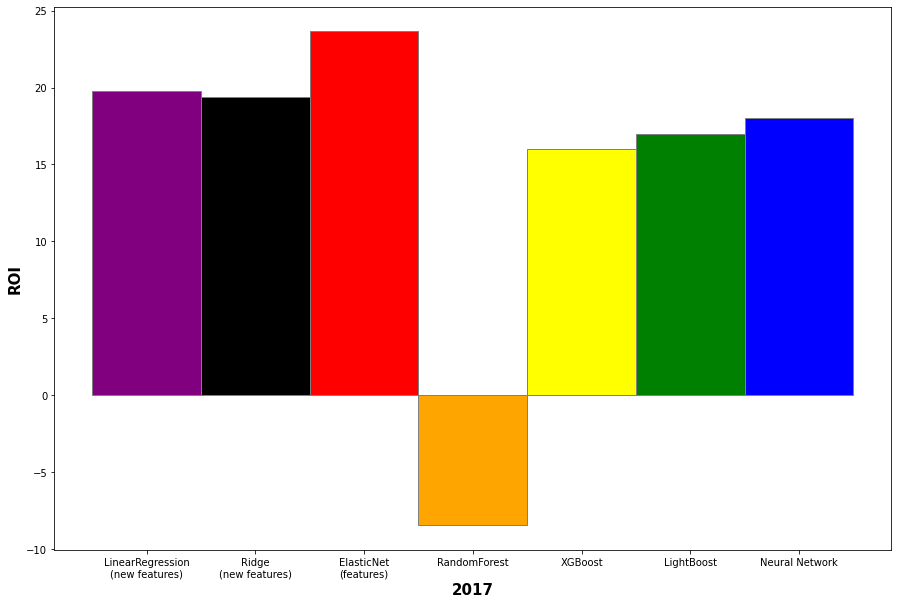

In [328]:
chartFromYear(2017)